<a href="https://colab.research.google.com/github/Angelgz011/estadistica2/blob/main/eii_u1_e_22150429.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La hipotesis plantea que los trastornos depresivos aumentan la probabilidad de desarrollar un trastorno alimenticio
 Se usará la variable 'Depressive disorder' como variable independiente X, y 'Eating disorders' como variable independiente Y.



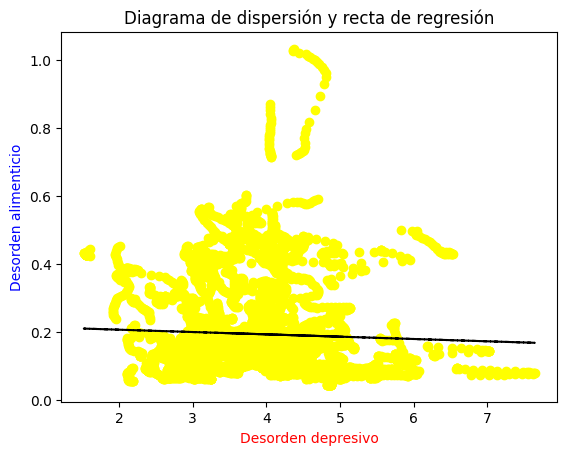

Coeficiente de correlación: -0.0461

Con un coeficiente de correlación de -0.0461, al ser un valor muy cercano a 0, se concluye que practicamente no hay relación lineal entre las variables
 y el negativo nos indica que esta ligeramente a la inversa, mientras x sube, y tiende a disminuir aunque muy sutilmente 

El coeficiente  de determinación es: 0.0021, lo que nos indica que solo el 0.2125% de los trastornos alimenticios puede ser relacionada con los trastornos depresivos
 Este valor resulta insignificante para marcar una relación entre las variables.

Intervalo de confianza para b1 de  95%
-0.0105 < b1 < -0.0031

El intervalo de confianza no contiene el 0, por lo que es un modelo aceptable.


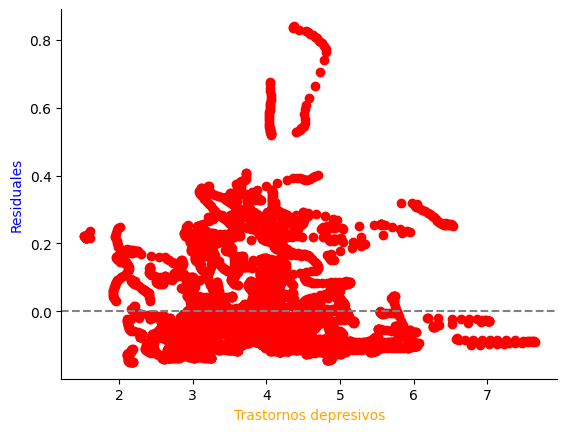

Según el gráfico, no se aprecia unarelación lineal clara, si no más bien algo disperso, por lo que no se cumple el supuesto de linealidad
Debido a la disperción tan irregular, no es posible confirmar que se siga una tendencia normal.
En el gráfico se observa una concentración en la parte inferior y algo más disperso en la parte superior, lo que sugiere heterocedasticidad. Por lo que tampoco se cumple el supuesto de homocedasticidad.


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("https://raw.githubusercontent.com/Angelgz011/estadistica2/refs/heads/main/mental_health.csv")
df.dropna(inplace=True)
#A)
print("La hipotesis plantea que los trastornos depresivos aumentan la probabilidad de desarrollar un trastorno alimenticio\n Se usará la variable 'Depressive disorder' como variable independiente X, y 'Eating disorders' como variable independiente Y.\n")

# Variable independiente X
X = df['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized']

# Variable dependiente Y
Y = df['Eating disorders (share of population) - Sex: Both - Age: Age-standardized']


#B)
# Pasos para obtener la recta de regresión ajustada
#Realizar un diagrama de disperción de datos
plt.scatter(X, Y, color = "yellow")
plt.xlabel('Desorden depresivo', color= "red")
plt.ylabel('Desorden alimenticio', color = "blue")
plt.title('Diagrama de dispersión y recta de regresión')


# Obtenemos la recta de regresión ajustada con PANDAS
import statsmodels.api as sm
x_constante = sm.add_constant(X)
modelo = sm.OLS(Y, x_constante).fit()
b0, b1 = modelo.params
fun = lambda x: b0 + b1 * x #Definimos la euación necesaria para la recta
Yc = fun(X)
#C)
plt.plot(X, Yc, color = 'black', linestyle = '--') #Graficamos sobre el gráfico de disperción
plt.show()

#D) Y E)
from scipy.stats import pearsonr
r,_= pearsonr(X,Y)

print(f'Coeficiente de correlación: {r:0.4f}\n')
print(f"Con un coeficiente de correlación de {r:0.4f}, al ser un valor muy cercano a 0, se concluye que practicamente no hay relación lineal entre las variables\n y el negativo nos indica que esta ligeramente a la inversa, mientras x sube, y tiende a disminuir aunque muy sutilmente \n")
r_cuadrado = r**2
print(f"El coeficiente  de determinación es: {r_cuadrado:0.4f}, lo que nos indica que solo el {r_cuadrado*100:0.4f}% de los trastornos alimenticios puede ser relacionada con los trastornos depresivos\n Este valor resulta insignificante para marcar una relación entre las variables.\n")

#F)
nivel_de_confianza = 0.95
intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
print(f"Intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}")
print(f"{intervalo_de_confianza_b1[0]:0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}\n")
print("El intervalo de confianza no contiene el 0, por lo que es un modelo aceptable.")


#g)
residuales = modelo.resid
plt.figure()
plt.scatter(X, residuales, color = "red")
plt.xlabel("Trastornos depresivos", color = "orange")
plt.ylabel("Residuales", color = "blue")
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.axhline( y = 0, color = "gray", linestyle = "--")
plt.show()
print("Según el gráfico, no se aprecia unarelación lineal clara, si no más bien algo disperso, por lo que no se cumple el supuesto de linealidad")
print("Debido a la disperción tan irregular, no es posible confirmar que se siga una tendencia normal.")
print("En el gráfico se observa una concentración en la parte inferior y algo más disperso en la parte superior, lo que sugiere heterocedasticidad. Por lo que tampoco se cumple el supuesto de homocedasticidad.")